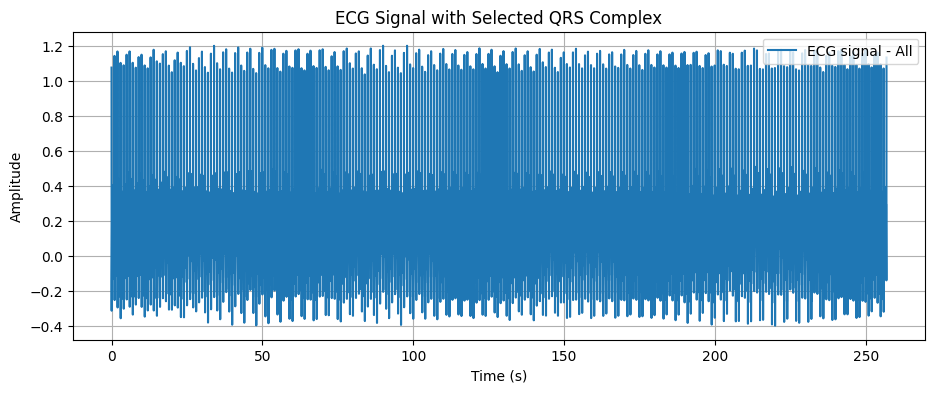

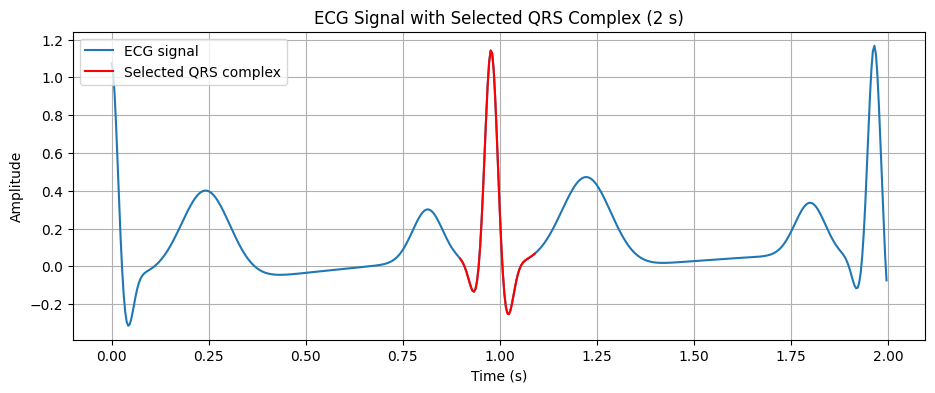

Heart Rate: 60.06 BPM


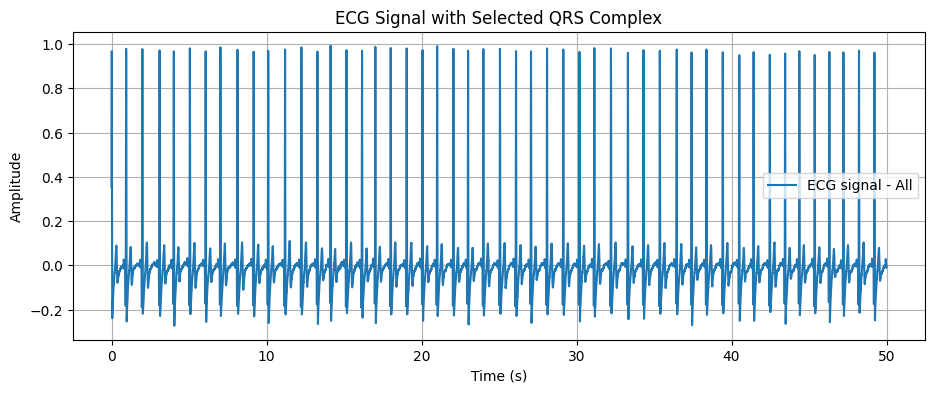

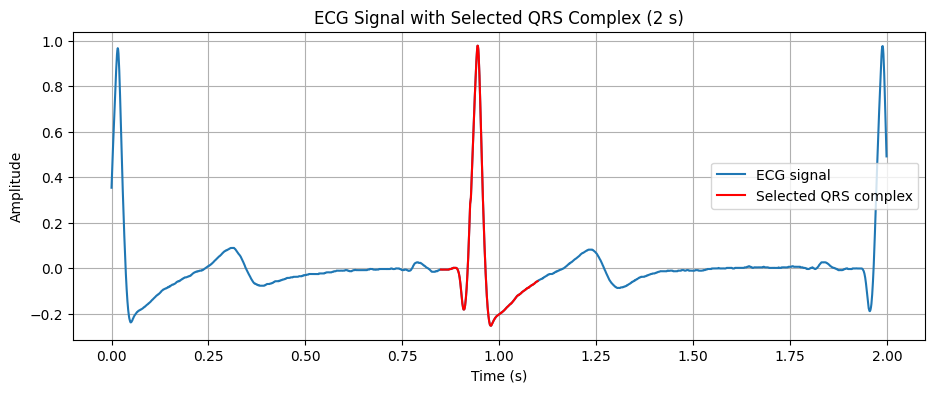

Heart Rate: 61.29 BPM


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from ecgdetectors import Detectors
from typing import Any


class Solution:

    def __init__(self, ecg_array: np.array, location: Path, custom_frequency=None):
        self.ecg_values = ecg_array[:, 1]
        
        self.fs = len(self.ecg_values) / ecg_array[-1][0] if custom_frequency is None else custom_frequency
        self.location = location

    # task 1 - detect QRS Complexes
    def build_graph_all_time(self, custom_name: str, to_image=False):
        """

        """
        time_plot = np.arange(len(self.ecg_values)) / self.fs
        # Plotting - visualization
        plt.figure(figsize=(11, 4))
        plt.plot(time_plot, self.ecg_values, label='ECG signal - All')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('ECG Signal with Selected QRS Complex')
        plt.legend()
        plt.grid(True)
        plt.savefig(self.location / f'graph_all_{custom_name}.png') if to_image else plt.show()

    # task 1 - detect QRS Complexes
    def build_graph_in_specific_time_range(self, plot_duration: int, q_location: int, s_location: int, custom_name: str, to_image=False) -> Any:
        """
        Building a plot with time (x) and amplitude (y) in the specific time range.
        Explanations are commented.

        :param plot_duration: the duration of plot in seconds
        :param q_location: the index of Q wave in np.array()
        :param s_location: the index of S wave in np.array()
        """
        
        # Calculate the number of sample by multiplying seconds by frequency
        num_samples = int(plot_duration * self.fs)

        # Start index can be adjusted (0 by default)
        start_index = 0

        # Must be start_index + num_samples (0+num_samples by default)
        end_index = start_index + num_samples

        # Slice the np.array from start to end indices
        # f.e. [0.12 0.23 0.54 0.13 0.76 ... 0.56]; len(array) = 512
        # it builds 512 dots laid on the y axe
        ecg_plot = self.ecg_values[start_index:end_index]

        # The array of time values divided by frequency
        # f.e. [0 1 2 3 4 ...  512] / fs (256 Hz); len(array) = 512
        # it builds 512 dots laid on the x axe
        time_plot = np.arange(num_samples) / self.fs

        # NOTE: the ecg_plot and time_plot length should be the same to keep 2D dimension logic

        # Plotting - visualization
        plt.figure(figsize=(11, 4))
        plt.plot(time_plot, ecg_plot, label='ECG signal')

        # Highlight QRS complex
        plt.plot(time_plot[q_location:s_location], self.ecg_values[q_location:s_location], color='red',
                 label='Selected QRS complex')
        
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'ECG Signal with Selected QRS Complex ({plot_duration} s)')
        plt.legend()
        plt.grid(True)
        plt.savefig(self.location / f'graph_specific_time_{plot_duration}_s_{custom_name}.png') if to_image else plt.show()

    @staticmethod
    def detect_qrs_complex_using_pan_tompkins(ecg: np.array, fs_val: int) -> np.array:
        """
        Return QRS Complexes using open-source `ecgdetectors` module. R-Peak detection.
        TO INSTALL: pip install py-ecg-detectors
        """
        return Detectors(fs_val).pan_tompkins_detector(ecg)

    #  task 2 - measure heart rate
    def calculate_heart_rate(self) -> float:
        """
        Calculate Heart Rate.
        Return heart rate (in float) by dividing 60 by the mean of distances between peaks (converted to ms)
        Explanations are commented.

        """
        # Finds the QRS peaks (literally R peaks detection)
        qrs_peaks = self.detect_qrs_complex_using_pan_tompkins(self.ecg_values, self.fs)

        # Calculate RR Intervals - distance between two adjacent peaks (np.diff) and divide by frequency
        rr_intervals = np.diff(qrs_peaks) / self.fs
        # Find the average of RR intervals (np.mean)
        average_rr_interval = np.mean(rr_intervals)
        # Divide by 60 (per minute convention)
        hr = 60 / average_rr_interval

        # Print Heart rate with 2 place decimal value in BPM
        print("Heart Rate: {:.2f} BPM".format(hr))
        return hr


if __name__ == '__main__':
    location = Path(r'C:\Users\kerim\Desktop\DSP\ecg_data')
    
    raw_file_1 = np.loadtxt('https://raw.githubusercontent.com/rustamPy/notes/main/person_1.dat')
    raw_file_2 = np.loadtxt('https://raw.githubusercontent.com/rustamPy/notes/main/person_2.dat')
    
    person_1 = Solution(raw_file_1, location)
    person_1 .build_graph_all_time('person_1', True)
    person_1 .build_graph_in_specific_time_range(2, 230, 280,'person_1')
    person_1 .calculate_heart_rate()
    
    person_2 = Solution(raw_file_2, location, custom_frequency=1000)
    person_2 .build_graph_all_time('person_2', True)
    person_2 .build_graph_in_specific_time_range(2, 850, 1100, 'person_2')
    person_2 .calculate_heart_rate()

